# Demo-1: Spectral Selectivity from selective RF Pulse. 

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from pprint import pprint

import SpSpSelectivity

We start from an easy example

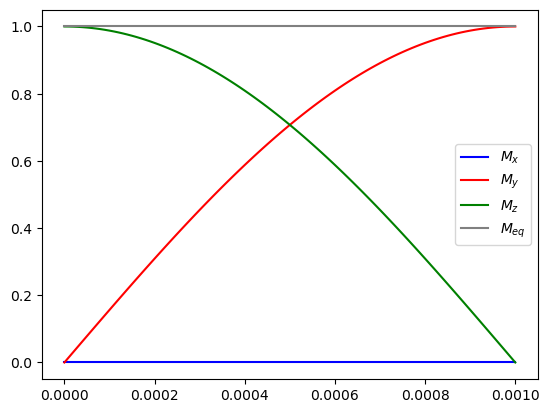

In [2]:
T_1 = 1             # sec
R_1 = 0 # 1 / T_1       # s^-1
T_2 = 0.05          # sec
R_2 = 0 # 1 / T_2       # s^-1
deltaOmegaZ = 0     # rad
omega1Y = 0         # rad
omega1X = 250 * 2* np.pi       # rad
nSteps = int(1e2)
tau = 1e-3             # sec
dTau = tau/nSteps    # sec
dTauList = np.linspace(start=0, stop=tau, num=nSteps+1, endpoint=True)

# A = np.array([[-R_2, deltaOmegaZ, -omega1Y, 0],[-deltaOmegaZ, -R_2,omega1X,0],[omega1Y, -omega1X, R_1, R_1],[0,0,0,0]])

A = SpSpSelectivity.constructBlochMatrix(deltaOmegaZ=deltaOmegaZ, omega1X=omega1X, omega1Y=omega1Y, R_1=R_1, R_2=R_2)

M_0T = np.array([[0,0,1,1]])
M_0 = M_0T.T

mTrajList = SpSpSelectivity.solveAnalyticalBlochTraj(A, M_0, nSteps, dTau)



plt.figure()
plt.plot(dTauList,mTrajList[:,0], color='blue' ,label='$M_x$')
plt.plot(dTauList,mTrajList[:,1], color='red'  ,label='$M_y$')
plt.plot(dTauList,mTrajList[:,2], color='green',label='$M_z$')
plt.plot(dTauList,mTrajList[:,3], color='grey' ,label='$M_{eq}$')

plt.legend(loc='best')
plt.show()

overallPropagator = SpSpSelectivity.solveAnalyticalBlochStepPropagator(A, tau)
finalState = np.dot(overallPropagator, M_0)

In [3]:
pprint(mTrajList[-1])

pprint(finalState)

array([[ 0.00000000e+00],
       [ 1.00000000e+00],
       [-5.58580959e-16],
       [ 1.00000000e+00]])
array([[0.],
       [1.],
       [0.],
       [1.]])


Then we launch a sweep of RF offset frequency

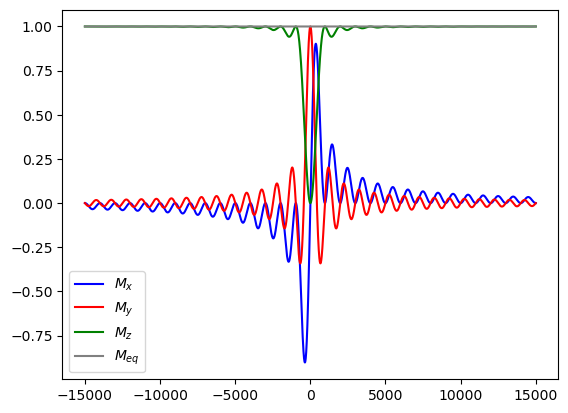

In [4]:
deltaOmegaZRange = np.linspace(start=-15000, stop=15000, num=5001, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    A = SpSpSelectivity.constructBlochMatrix(deltaOmegaZ=freqOffset*2*np.pi, omega1X=omega1X, omega1Y=omega1Y, R_1=R_1, R_2=R_2)
    overallPropagator = SpSpSelectivity.solveAnalyticalBlochStepPropagator(A, tau)
    offsetSweepTraj.append(np.dot(overallPropagator, M_0)) 
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange,offsetSweepTraj[:,0], color='blue' ,label='$M_x$')
plt.plot(deltaOmegaZRange,offsetSweepTraj[:,1], color='red'  ,label='$M_y$')
plt.plot(deltaOmegaZRange,offsetSweepTraj[:,2], color='green',label='$M_z$')
plt.plot(deltaOmegaZRange,offsetSweepTraj[:,3], color='grey' ,label='$M_{eq}$')

plt.legend(loc='best')
plt.show()

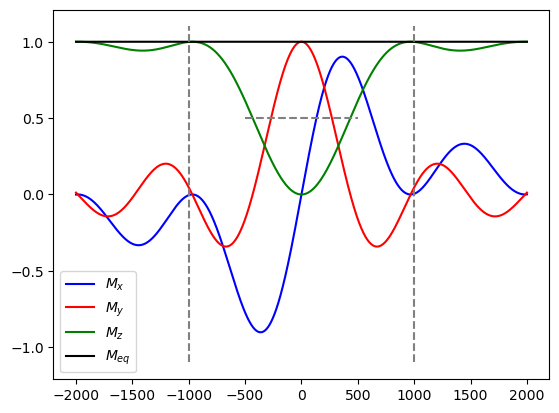

In [5]:
deltaOmegaZRange = np.linspace(start=-2000, stop=2000, num=5001, endpoint=True)

offsetSweepTraj = []

for freqOffset in deltaOmegaZRange:
    A = SpSpSelectivity.constructBlochMatrix(deltaOmegaZ=freqOffset*2*np.pi, omega1X=omega1X, omega1Y=omega1Y, R_1=R_1, R_2=R_2)
    overallPropagator = SpSpSelectivity.solveAnalyticalBlochStepPropagator(A, tau)
    offsetSweepTraj.append(np.dot(overallPropagator, M_0)) 
offsetSweepTraj = np.asarray(offsetSweepTraj)

plt.figure()
plt.plot(deltaOmegaZRange,offsetSweepTraj[:,0], color='blue' ,label='$M_x$')
plt.plot(deltaOmegaZRange,offsetSweepTraj[:,1], color='red'  ,label='$M_y$')
plt.plot(deltaOmegaZRange,offsetSweepTraj[:,2], color='green',label='$M_z$')
plt.plot(deltaOmegaZRange,offsetSweepTraj[:,3], color='black' ,label='$M_{eq}$')

plt.hlines(y=.5,xmax=500,xmin=-500,linestyles='dashed',color='grey')

plt.vlines(x=1000,ymax=1.1,ymin=-1.1,linestyles='dashed',color='grey')
plt.vlines(x=-1000,ymax=1.1,ymin=-1.1,linestyles='dashed',color='grey')


plt.legend(loc='best')
plt.show()

The figures above show the excitation profile of a 1-ms long square pulse.

Then we go to a 1-ms long Gaussian pulse. We use a 100 step approximation, cutting off at 1%.

0.003367090077063996 0.3987479744270368 118.42509861652806 15.989435673179225


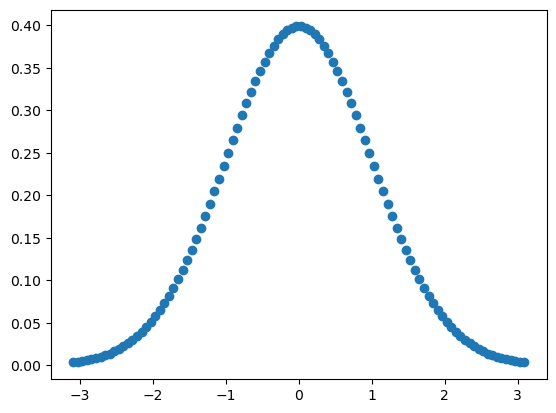

In [6]:
cutoff = 0.001
x = np.linspace(scipy.stats.norm.ppf(cutoff), scipy.stats.norm.ppf(1-cutoff),100)
gauss_x = scipy.stats.norm.pdf(x)
plt.scatter(x, gauss_x)

print(gauss_x[0], gauss_x[50], gauss_x[50]/gauss_x[0], np.sum(gauss_x))

In [ ]:
def solveBlochRfWaveformPropagator(:np.array, Tau:float):
    A.astype(np.float64)
    return np.asarray(scipy.linalg.expm(A*Tau), dtype=np.float64)

def solveBlochRfWaveformTraj(A:np.array, M_0:np.array, nbr_steps:int, dTau:float):
    A.astype(np.float64)
    M_0.astype(np.float64)
    propagator = solveAnalyticalBlochStepPropagator(A, dTau)

    mTrajList = []
    mTrajList.append(M_0)
    
    for i_step in range(nbr_steps):
        M_0 = np.dot(propagator, M_0)
        mTrajList.append(M_0)

    return np.asarray(mTrajList, dtype=np.float64)